## Data Cleaning pandas 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
#importando módulos

In [2]:
df = pd.read_csv('attacks.csv', encoding = 'latin-1')
#Importando el csv

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [4]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


Despues de observar el dataset nos quedaremos con algunas columnas
ya que muchas de ellas tiene información repetida o innecesaria

In [5]:
df = df.drop(['Case Number.1','Case Number.2','Unnamed: 22','Unnamed: 23',
             'href','href formula','pdf'], axis = 1)
#Drop sobre las columnas mencionadas,
#tienen información duplicada e innecesaria

In [6]:
df[6300:6320]
#Apartir del rango 6301 los valores son nulos en todas las columnas

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",3.0
6301,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN,S.W. Baker,2.0
6302,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6304.0
6303,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6305.0
6304,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6306.0
6305,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6307.0
6306,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6308.0
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = df.drop(range(6302,25722), axis = 0)
#drop sobre el rango especificado

In [9]:
df.tail()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",5.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",4.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",3.0
6301,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN,S.W. Baker,2.0
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df = df.reset_index()
df.info()
#reset index sobre el data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6303 entries, 0 to 6302
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   6303 non-null   int64  
 1   Case Number             6302 non-null   object 
 2   Date                    6302 non-null   object 
 3   Year                    6300 non-null   float64
 4   Type                    6298 non-null   object 
 5   Country                 6252 non-null   object 
 6   Area                    5847 non-null   object 
 7   Location                5762 non-null   object 
 8   Activity                5758 non-null   object 
 9   Name                    6092 non-null   object 
 10  Sex                     5737 non-null   object 
 11  Age                     3471 non-null   object 
 12  Injury                  6274 non-null   object 
 13  Fatal (Y/N)             5763 non-null   object 
 14  Time                    2948 non-null   

Iremos asignando las columnas que terminemos de limpiar a un nuevo dataframe para resguardar la información concluida.

In [12]:
shark = pd.DataFrame(df['original order'])
# Tomamos el original order como primer valor, suponiendo que se refiere
# a un valor tipo índice, no se repite

In [17]:
shark['original order'].value_counts()

569.0     2
4603.0    1
4899.0    1
810.0     1
796.0     1
         ..
3256.0    1
3106.0    1
3080.0    1
2812.0    1
6272.0    1
Name: original order, Length: 6301, dtype: int64

In [18]:
#regresando a trabajar con el dataframe original
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6303 entries, 0 to 6302
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   6303 non-null   int64  
 1   Case Number             6302 non-null   object 
 2   Date                    6302 non-null   object 
 3   Year                    6300 non-null   float64
 4   Type                    6298 non-null   object 
 5   Country                 6252 non-null   object 
 6   Area                    5847 non-null   object 
 7   Location                5762 non-null   object 
 8   Activity                5758 non-null   object 
 9   Name                    6092 non-null   object 
 10  Sex                     5737 non-null   object 
 11  Age                     3471 non-null   object 
 12  Injury                  6274 non-null   object 
 13  Fatal (Y/N)             5763 non-null   object 
 14  Time                    2948 non-null   

In [20]:
#trabajando sobre la columna date.
df['Date'].isna().sum()
#cuenta con un valor nulo

1

In [21]:
df['Date'].tail()
#los valores son poco consistentes al final, supongo debido a la antiguedad

6298    Before 1903
6299      1900-1905
6300      1883-1889
6301      1845-1853
6302            NaN
Name: Date, dtype: object

In [22]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
#usamos el parámetro errors = coerce, nos arroja un Nat si no tiene un input
#válido

In [24]:
df['Date'].isna().sum()
#considero que los valores retornados como Nats son pocos considerando que
#tenemos fechas de antes de 1900, las cuales no son especificadas.

845

In [25]:
df.info()
#el valor date ya es un tipo datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6303 entries, 0 to 6302
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   6303 non-null   int64         
 1   Case Number             6302 non-null   object        
 2   Date                    5458 non-null   datetime64[ns]
 3   Year                    6300 non-null   float64       
 4   Type                    6298 non-null   object        
 5   Country                 6252 non-null   object        
 6   Area                    5847 non-null   object        
 7   Location                5762 non-null   object        
 8   Activity                5758 non-null   object        
 9   Name                    6092 non-null   object        
 10  Sex                     5737 non-null   object        
 11  Age                     3471 non-null   object        
 12  Injury                  6274 non-null   object  

In [27]:
df.head()

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order
0,0,2018.06.25,2018-06-25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",6303.0
1,1,2018.06.18,2018-06-18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",6302.0
2,2,2018.06.09,2018-06-09,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",6301.0
3,3,2018.06.08,2018-06-08,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",6300.0
4,4,2018.06.04,2018-06-04,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,6299.0


In [28]:
#pasamos nuestra columna date a nuestro datafram sharks
shark['Date'] = df['Date']
shark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6303 entries, 0 to 6302
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   original order  6302 non-null   float64       
 1   Date            5458 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 98.6 KB


In [29]:
df.info()
#Limpiando la siguiente columna 'Year'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6303 entries, 0 to 6302
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   6303 non-null   int64         
 1   Case Number             6302 non-null   object        
 2   Date                    5458 non-null   datetime64[ns]
 3   Year                    6300 non-null   float64       
 4   Type                    6298 non-null   object        
 5   Country                 6252 non-null   object        
 6   Area                    5847 non-null   object        
 7   Location                5762 non-null   object        
 8   Activity                5758 non-null   object        
 9   Name                    6092 non-null   object        
 10  Sex                     5737 non-null   object        
 11  Age                     3471 non-null   object        
 12  Injury                  6274 non-null   object  

In [30]:
df['Year'].astype(int)
#intentamos pasas a integer

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [35]:
#buscando errores
df['Year'].tail()
# no se puede convertir por los NA

6298    0.0
6299    0.0
6300    0.0
6301    0.0
6302    NaN
Name: Year, dtype: float64

In [37]:
df['Year'].isna().sum()

3

In [38]:
df['Year'] = df['Year'].fillna(0)
df['Year'].isna().sum()

0

In [40]:
df['Year'] = df['Year'].astype(int)
# Columnas year ya es un integer la pasamos a sharks

In [42]:
shark['Year'] = df['Year']
shark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6303 entries, 0 to 6302
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   original order  6302 non-null   float64       
 1   Date            5458 non-null   datetime64[ns]
 2   Year            6303 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 147.9 KB


In [43]:
df.info()
#procedemos con la columna Type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6303 entries, 0 to 6302
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   6303 non-null   int64         
 1   Case Number             6302 non-null   object        
 2   Date                    5458 non-null   datetime64[ns]
 3   Year                    6303 non-null   int64         
 4   Type                    6298 non-null   object        
 5   Country                 6252 non-null   object        
 6   Area                    5847 non-null   object        
 7   Location                5762 non-null   object        
 8   Activity                5758 non-null   object        
 9   Name                    6092 non-null   object        
 10  Sex                     5737 non-null   object        
 11  Age                     3471 non-null   object        
 12  Injury                  6274 non-null   object  

In [45]:
df['Type'].head(20)
# al parecer esta columna nos da información sobre si el ataque fue provocado

0          Boating
1       Unprovoked
2          Invalid
3       Unprovoked
4         Provoked
5       Unprovoked
6       Unprovoked
7       Unprovoked
8       Unprovoked
9       Unprovoked
10        Provoked
11      Unprovoked
12      Unprovoked
13         Invalid
14        Provoked
15      Unprovoked
16    Questionable
17      Unprovoked
18      Unprovoked
19      Unprovoked
Name: Type, dtype: object

In [46]:
df['Type'].unique()
#observamos que tiene pocas categorías, la mayoría erradas al parecer

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

In [47]:
df['Type'].value_counts()

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: Type, dtype: int64

In [52]:
#nos quedamos con tres categorías, Provoked, Unprovoked y las demás 
#las pasaremos a Unknow
dic = {'Invalid': 'UNKNOW','Sea Disaster':'UNKNOW', 'Boating':'UNKNOW',
       'Boat':'UNKNOWN', 'Questionable':'UNKNOW', 'Boatomg':'UNKNOW'}
df['Type'] = df['Type'].replace(dic)
#Usamos replace y definimos un diccionario para cambiar los valores
df['Type'].value_counts()

Unprovoked    4595
UNKNOW        1129
Provoked       574
Name: Type, dtype: int64

In [53]:
#revisamos nulos
df['Type'].isna().sum()

5

In [55]:
df['Type'] = df['Type'].fillna('UNKNOW')
#rellenamos valores nulos
df['Type'].isna().sum()

0

In [56]:
# pasamos Type a nuestro dataset shark
shark['Type'] = df['Type']
shark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6303 entries, 0 to 6302
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   original order  6302 non-null   float64       
 1   Date            5458 non-null   datetime64[ns]
 2   Year            6303 non-null   int64         
 3   Type            6303 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 197.1+ KB


In [57]:
df.info()
#siguiente columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6303 entries, 0 to 6302
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   6303 non-null   int64         
 1   Case Number             6302 non-null   object        
 2   Date                    5458 non-null   datetime64[ns]
 3   Year                    6303 non-null   int64         
 4   Type                    6303 non-null   object        
 5   Country                 6252 non-null   object        
 6   Area                    5847 non-null   object        
 7   Location                5762 non-null   object        
 8   Activity                5758 non-null   object        
 9   Name                    6092 non-null   object        
 10  Sex                     5737 non-null   object        
 11  Age                     3471 non-null   object        
 12  Injury                  6274 non-null   object  

In [60]:
df['Country'][3000:3030]
#Bastante integridad y pocos Nulos

3000       AUSTRALIA
3001             USA
3002         REUNION
3003    SOUTH AFRICA
3004             USA
3005             USA
3006             USA
3007             USA
3008             USA
3009             USA
3010             USA
3011             USA
3012             USA
3013             USA
3014             USA
3015             USA
3016             USA
3017             USA
3018             USA
3019         BAHAMAS
3020             USA
3021    SOUTH AFRICA
3022             USA
3023    SOUTH AFRICA
3024         ENGLAND
3025             USA
3026             USA
3027     SOUTH KOREA
3028    SOUTH AFRICA
3029             USA
Name: Country, dtype: object

In [61]:
df['Country'].unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', nan, 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, British overseas territory', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'Fiji', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ITALY', 'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 'UNITE

In [64]:
df['Country'].isna().sum()
#51 nulos

51

In [86]:
df.loc[df['Country'].isna()]
#obteniendo los indices de los nulos para analizar si podemos 
#llenarnos con area o location

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order
62,62,2017.11.13.R,NaT,2017,Unprovoked,NaN,NaN,NaN,Surfing,Timur Yunusov,M,24,Puncture wounds to feet,N,NaN,NaN,Instagram,6241.0
525,525,2014.08.00,2014-08-01,2014,UNKNOW,NaN,NaN,NaN,Sea disaster,Cuban refugees,M,NaN,Shark involvement prior to death not confirmed,NaN,NaN,Shark involvement not confirmed,"Associated Press, 11/27/2014",5778.0
2956,2956,1983.00.00.d,NaT,1983,Unprovoked,NaN,English Channel,NaN,Swimming,Padma Shri Taranath Narayan Shenoy,M,NaN,Left leg bitten,N,NaN,NaN,"Times of India, 2/5/2012",3347.0
3378,3378,1970.11.00,1970-11-01,1970,Unprovoked,NaN,NaN,NaN,NaN,Heinz Plotsky,M,NaN,Extensive injuries,N,NaN,NaN,"H.D. Baldridge (1994), SAF Case #1645",2925.0
3387,3387,1970.08.02,1970-08-02,1970,UNKNOW,NaN,Caribbean Sea,Between St. Kitts & Nevis,Sea Disaster Sinking of ferryboat Christina,NaN,NaN,NaN,"Sharks scavenged on bodies, but no record of t...",NaN,Afternoon,Shark involvement prior to death was not confi...,"Rome News Tribune, 8/3/1970",2916.0
3388,3388,1970.07.05,1970-07-05,1970,Unprovoked,NaN,NaN,NaN,NaN,male,M,NaN,Finger or toe severed,N,Night,Mako shark,"H.D. Baldridge (1994), SAF Case #1628",2915.0
3395,3395,1970.04.00.b,1970-04-01,1970,Provoked,NaN,NaN,NaN,Freediving,Lionel Jarvis,M,NaN,Arm abraded & lacerated. Recorded as PROVOKED ...,N,NaN,Wobbegong shark,"H.D. Baldridge (1994), SAF Case #1616",2908.0
3399,3399,1970.02.05,1970-02-05,1970,Unprovoked,NaN,NaN,NaN,Wading,Sally Anne Irvine,F,8,Lacerations to lower leg,N,NaN,Carpet shark,H.D. Baldridge (1994) SAF Case #1626,2904.0
3425,3425,1969.08.00,1969-08-01,1969,Unprovoked,NaN,NaN,NaN,NaN,Rodney Hughes,M,25,Am lacerated,N,NaN,NaN,H.D. Baldridge (1994) SAF Case #1602,2878.0
3605,3605,1965.10.21,1965-10-21,1965,Unprovoked,NaN,NaN,Florida Strait,The boat Caribou II sank,Mario Castellanos,M,39,Survived,N,NaN,NaN,"Lodi News Sentinel, 10/30/1965",2698.0


In [88]:
#en estas columnas la información es poco consistente por lo que
# prefiero llenarnos con UNKNOW
df['Country'] = df['Country'].fillna('UNKNOW')
df['Country'].isna().sum()

0

In [89]:
df.loc[df['Country'] == 'ASIA?']
#poco consistente

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order
6291,6291,ND.0011,NaT,0,Unprovoked,ASIA?,NaN,NaN,Swimming,Mr. Masury,M,NaN,Foot severed,N,NaN,NaN,"Ref. J. T. Dubois in N.Y. Sun, 3/19/1911",12.0


In [90]:
#pasamos Country a shark
shark['Country'] = df['Country']
shark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6303 entries, 0 to 6302
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   original order  6302 non-null   float64       
 1   Date            5458 non-null   datetime64[ns]
 2   Year            6303 non-null   int64         
 3   Type            6303 non-null   object        
 4   Country         6303 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 246.3+ KB


In [91]:
df.info()
#trabajamos con la columna area

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6303 entries, 0 to 6302
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   6303 non-null   int64         
 1   Case Number             6302 non-null   object        
 2   Date                    5458 non-null   datetime64[ns]
 3   Year                    6303 non-null   int64         
 4   Type                    6303 non-null   object        
 5   Country                 6303 non-null   object        
 6   Area                    5847 non-null   object        
 7   Location                5762 non-null   object        
 8   Activity                5758 non-null   object        
 9   Name                    6092 non-null   object        
 10  Sex                     5737 non-null   object        
 11  Age                     3471 non-null   object        
 12  Injury                  6274 non-null   object  

In [92]:
df.loc[df['Area'].isna()]

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order
32,32,2018.04.09,2018-04-09,2018,Unprovoked,NEW CALEDONIA,NaN,"Magenta Beach, Noumea",Windsurfing,NaN,NaN,NaN,"No injury, shark bit board",N,17h00,2 m shark,"Les Nouvelles Caledoniennes, 4/10/2018",6271.0
33,33,2018.04.05,2018-04-05,2018,Unprovoked,BAHAMAS,NaN,Bimini,Swimming,Shane McConnell,M,12,"2 puncture wounds to left foot, abrasion to ri...",N,18h00,Bull shark,"K. McMurray, TrackingSharks.com",6270.0
48,48,2018.01.21,2018-01-21,2018,Unprovoked,NEW CALEDONIA,NaN,Nouville,Spearfishing,male,M,40s,Injuries to abdomen and arm,N,15h30,"Bull shark, 3 m",TrackingSharks.com,6255.0
56,56,2017.12.09,2017-12-09,2017,Unprovoked,BAHAMAS,NaN,NaN,Snorkeling,Sarah Illig-Carroll,F,25,Minor injury to arm,N,NaN,Nurse shark. 5',"Daily Star, 12/11/2017",6247.0
59,59,2017.11.25.R,NaT,2017,UNKNOW,LIBYA,NaN,Gars Garabulli,2 boats capsized,31 migrants,NaN,NaN,FATAL,Y,NaN,Some drowned but other may have been killed by...,"TG Com 24, 11/25/2017",6244.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6293,6293,ND.0009,NaT,0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,boy,M,NaN,"FATAL, knocked overboard by tail of shark & ca...",Y,NaN,Blue pointer,"NY Sun, 9/9/1906, referring to account by Loui...",10.0
6294,6294,ND.0008,NaT,0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,fisherman,M,NaN,FATAL,Y,NaN,Blue pointer,"NY Sun, 9/9/1906, referring to account by Loui...",9.0
6295,6295,ND.0007,NaT,0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,fisherman,M,NaN,FATAL,Y,NaN,Blue pointers,"NY Sun, 9/9/1906, referring to account by Loui...",8.0
6300,6300,ND.0002,NaT,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",3.0


In [93]:
df['Area'].unique()

array(['California', 'Georgia', 'Hawaii', 'New South Wales', 'Colima',
       'Pernambuco', 'Florida', 'Queensland', 'South Carolina',
       'Cornwall', 'Westerm Australia', 'Eastern Cape Province',
       'Hua Hin', 'Cocos Island', 'Western Australia',
       'Alifu Alifu Atoll', 'Western Cape Province', 'New Providence',
       'Alagoas', nan, 'Victoria', 'KwaZulu-Natal',
       'Boi Island, Victoria', 'Galapagos Islands', 'Fernando de Noronha',
       'Sepang', 'Holquin Province', 'Pamplemousses ', 'South Australia',
       'North Island', 'New York', 'Canary Islands', ' Upolu Island',
       'Shizuoka Prefecture', 'Texas', 'Castellón', 'Massachusetts',
       'Red Sea Protectorate', 'New Providence District',
       '40 miles off Grand Bahama Island', 'Ascension Island',
       'New Jersey', 'Majorca', 'Washington', 'Tabasco', 'Anjouan',
       'Ibiza Island', 'Marquesas', 'South Devon', 'New Providence ',
       'Sharjah, ', 'Baja California Sur', 'Saint-Leu', 'South Island',
   

In [95]:
df['Area'].isna().sum()

456

In [97]:
df['Area'] = df['Area'].fillna('UNKNOWN')
df['Area'].isna().sum()

0

In [98]:
#Pasamos Area a nuestro dataset shark
shark['Area'] = df['Area']
shark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6303 entries, 0 to 6302
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   original order  6302 non-null   float64       
 1   Date            5458 non-null   datetime64[ns]
 2   Year            6303 non-null   int64         
 3   Type            6303 non-null   object        
 4   Country         6303 non-null   object        
 5   Area            6303 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 295.6+ KB


In [99]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6303 entries, 0 to 6302
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   6303 non-null   int64         
 1   Case Number             6302 non-null   object        
 2   Date                    5458 non-null   datetime64[ns]
 3   Year                    6303 non-null   int64         
 4   Type                    6303 non-null   object        
 5   Country                 6303 non-null   object        
 6   Area                    6303 non-null   object        
 7   Location                5762 non-null   object        
 8   Activity                5758 non-null   object        
 9   Name                    6092 non-null   object        
 10  Sex                     5737 non-null   object        
 11  Age                     3471 non-null   object        
 12  Injury                  6274 non-null   object  

In [101]:
len(df['Location'].unique())

4109

In [102]:
df['Location'].value_counts()

New Smyrna Beach, Volusia County    163
Daytona Beach, Volusia County        30
Ponce Inlet, Volusia County          20
Melbourne Beach, Brevard County      18
Myrtle Beach, Horry County           17
                                   ... 
Greenport Sound, Long Island          1
Giulianova                            1
Levuka Point, Ovalau Island           1
Near Badu Island                      1
Mazatlán                              1
Name: Location, Length: 4108, dtype: int64

In [103]:
df['Location'] = df['Location'].fillna('UNKNOWN')

In [104]:
df['Location'].isna().sum()

0

In [105]:
#pasamos location a shark
shark['Location'] = df['Location']
shark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6303 entries, 0 to 6302
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   original order  6302 non-null   float64       
 1   Date            5458 non-null   datetime64[ns]
 2   Year            6303 non-null   int64         
 3   Type            6303 non-null   object        
 4   Country         6303 non-null   object        
 5   Area            6303 non-null   object        
 6   Location        6303 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 344.8+ KB


In [106]:
df.info()
# trabajamos con Activity.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6303 entries, 0 to 6302
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   6303 non-null   int64         
 1   Case Number             6302 non-null   object        
 2   Date                    5458 non-null   datetime64[ns]
 3   Year                    6303 non-null   int64         
 4   Type                    6303 non-null   object        
 5   Country                 6303 non-null   object        
 6   Area                    6303 non-null   object        
 7   Location                6303 non-null   object        
 8   Activity                5758 non-null   object        
 9   Name                    6092 non-null   object        
 10  Sex                     5737 non-null   object        
 11  Age                     3471 non-null   object        
 12  Injury                  6274 non-null   object  

In [112]:
df['Activity'].value_counts().head(20)

Surfing            971
Swimming           869
Fishing            431
Spearfishing       333
Bathing            162
Wading             149
Diving             127
Standing            99
Snorkeling          89
Scuba diving        76
Body boarding       61
Body surfing        49
Swimming            47
Kayaking            33
Treading water      32
Pearl diving        32
Fell overboard      32
Boogie boarding     29
Free diving         29
Windsurfing         19
Name: Activity, dtype: int64

In [113]:
len(df['Activity'].unique())

1533

In [123]:
patron_a = [r'.*?\bsurfing\b.*', r'.*?\bswimming\b.*', r'.*?\bwading\b.*', r'.*?\bdiving\b.*',
           r'.*?\bfishing\b.*', r'.*?\bspearfishing\b.*',r'.*?\bbathing\b.*', r'.*?\bstanding\b.*',
           r'.*?\bsnorkeling\b.*', r'.*?\bscuba diving\b.*', r'.*?\bbody boarding\b.*',
           r'.*?\bbody surfing\b.*', r'.*?\bswimming \b.*', r'.*?\bkayaking\b.*', 
            r'.*?\btreading water\b.*', r'.*?\bpearl diving\b.*', r'.*?\bfell overboard\b.*',
            r'.*?\bboogie boarding\b.*', r'.*?\bfree diving\b.*', r'.*?\bwindsurfing\b.*']
cat_a = ['surfing', 'swimming', 'fishing', 'spearfishing', 'bathing','standing',
        'snorkeling', 'scuba diving', 'body boarding', 'body surfing', 'swimming ',
        'kayaking', 'treading water', 'pearl diving', 'fell overboard',
        'boogie boarding', 'free diving', 'windsurfing', 'wading', 'diving']   

In [115]:
df['Activity'] = df['Activity'].str.lower()
# pasamos a lower para que se ajuste al patron

In [124]:
df['Activity2'] = df['Activity'].replace(patron_a,cat_a, regex=True)
#aplicamos replace con patrones probando con otra columna para asegurar

In [125]:
len(df['Activity2'].unique())
#funciona

757

In [126]:
df['Activity2'].value_counts()

swimming                       1110
surfing                        1103
bathing                         727
spearfishing                    507
standing                        424
                               ... 
walking in chest-deep water       1
finning the shark                 1
treading for clams                1
washing a dog                     1
collecting fish from net          1
Name: Activity2, Length: 756, dtype: int64

In [127]:
#pasamos activity2 shark
shark['Activity'] = df['Activity2']
shark.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6303 entries, 0 to 6302
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   original order  6302 non-null   float64       
 1   Date            5458 non-null   datetime64[ns]
 2   Year            6303 non-null   int64         
 3   Type            6303 non-null   object        
 4   Country         6303 non-null   object        
 5   Area            6303 non-null   object        
 6   Location        6303 non-null   object        
 7   Activity        5758 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 394.1+ KB


In [129]:
shark['Activity'] = shark['Activity'].fillna('UNKNOWN')
shark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6303 entries, 0 to 6302
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   original order  6302 non-null   float64       
 1   Date            5458 non-null   datetime64[ns]
 2   Year            6303 non-null   int64         
 3   Type            6303 non-null   object        
 4   Country         6303 non-null   object        
 5   Area            6303 non-null   object        
 6   Location        6303 non-null   object        
 7   Activity        6303 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 394.1+ KB


In [130]:
df.info()
#trabajamos con name

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6303 entries, 0 to 6302
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   6303 non-null   int64         
 1   Case Number             6302 non-null   object        
 2   Date                    5458 non-null   datetime64[ns]
 3   Year                    6303 non-null   int64         
 4   Type                    6303 non-null   object        
 5   Country                 6303 non-null   object        
 6   Area                    6303 non-null   object        
 7   Location                6303 non-null   object        
 8   Activity                5758 non-null   object        
 9   Name                    6092 non-null   object        
 10  Sex                     5737 non-null   object        
 11  Age                     3471 non-null   object        
 12  Injury                  6274 non-null   object  

In [131]:
df['Name'] = df['Name'].fillna('UNKNOWN')

In [132]:
#Pasamos Name a shark
shark['Name'] = df['Name']
shark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6303 entries, 0 to 6302
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   original order  6302 non-null   float64       
 1   Date            5458 non-null   datetime64[ns]
 2   Year            6303 non-null   int64         
 3   Type            6303 non-null   object        
 4   Country         6303 non-null   object        
 5   Area            6303 non-null   object        
 6   Location        6303 non-null   object        
 7   Activity        6303 non-null   object        
 8   Name            6303 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 443.3+ KB


In [133]:
df.info()
#trabajamos con sex

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6303 entries, 0 to 6302
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   6303 non-null   int64         
 1   Case Number             6302 non-null   object        
 2   Date                    5458 non-null   datetime64[ns]
 3   Year                    6303 non-null   int64         
 4   Type                    6303 non-null   object        
 5   Country                 6303 non-null   object        
 6   Area                    6303 non-null   object        
 7   Location                6303 non-null   object        
 8   Activity                5758 non-null   object        
 9   Name                    6303 non-null   object        
 10  Sex                     5737 non-null   object        
 11  Age                     3471 non-null   object        
 12  Injury                  6274 non-null   object  

In [135]:
df['Sex '].unique()

array(['F', 'M', nan, 'M ', 'lli', 'N', '.'], dtype=object)

In [136]:
df['Sex '].value_counts()

M      5094
F       637
N         2
M         2
lli       1
.         1
Name: Sex , dtype: int64

In [ ]:
#cambiamos valores 'M ' = 'M', 'lli' = unknown, 'N' = 'M', '.' = UNKNOWN

In [138]:
df['Sex '] = df['Sex '].replace({'M ':'M', 'lli': 'UNKNOWN', 'N': 'M','.': 'UNKNOWN'})
df['Sex '].value_counts()

M          5098
F           637
UNKNOWN       2
Name: Sex , dtype: int64

In [140]:
df['Sex '] = df['Sex '].fillna('UNKNOWN')

In [141]:
#Pasamos sex a shark
shark['Sex'] = df['Sex ']
shark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6303 entries, 0 to 6302
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   original order  6302 non-null   float64       
 1   Date            5458 non-null   datetime64[ns]
 2   Year            6303 non-null   int64         
 3   Type            6303 non-null   object        
 4   Country         6303 non-null   object        
 5   Area            6303 non-null   object        
 6   Location        6303 non-null   object        
 7   Activity        6303 non-null   object        
 8   Name            6303 non-null   object        
 9   Sex             6303 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 492.5+ KB


In [142]:
df.info()
#pasamos a age

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6303 entries, 0 to 6302
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   6303 non-null   int64         
 1   Case Number             6302 non-null   object        
 2   Date                    5458 non-null   datetime64[ns]
 3   Year                    6303 non-null   int64         
 4   Type                    6303 non-null   object        
 5   Country                 6303 non-null   object        
 6   Area                    6303 non-null   object        
 7   Location                6303 non-null   object        
 8   Activity                5758 non-null   object        
 9   Name                    6303 non-null   object        
 10  Sex                     6303 non-null   object        
 11  Age                     3471 non-null   object        
 12  Injury                  6274 non-null   object  

In [146]:
len(df.Age.unique())

158

In [147]:
df.Age.unique()

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '40', '13', '42', '3', '8',
       '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '\xa0 ', ' ', '30 or 36', '6½', '21 & ?', '75',
       '33 or 37', 'mid-30s', '23 & 20', ' 30', '7      &    31', ' 28',
       '20?', "60's", '32 & 30', '16 to 18', '87', '67', 'Elderly',
       'mid-20s', 'Ca. 33', '74 ', '45 ', '21 or 26', '20 ', '>50',
       '18 to 22', 'adult', '9 & 12', '? & 19', '9 months', '25 to 35',
  

In [148]:
df['Age2'] = df['Age'].str.extract('([0-9]{2})', expand=False)

In [153]:
df['Age2'].value_counts().head(20)

17    156
18    153
20    151
19    143
16    139
15    139
21    122
22    117
25    110
24    106
14    102
13     96
30     87
26     83
28     83
23     82
29     78
27     78
12     75
32     70
Name: Age2, dtype: int64

In [155]:
df['Age2'] = df['Age2'].astype(int)

ValueError: cannot convert float NaN to integer

In [160]:
def age_int(age):
    try:
        age = int(age)
    except ValueError:
        age = 0
    return age

In [162]:
df['Age2'] = df['Age2'].apply(age_int)

In [164]:
df['Age2'].value_counts()

0     2981
17     156
18     153
20     151
19     143
      ... 
81       1
86       1
82       1
67       1
87       1
Name: Age2, Length: 74, dtype: int64

In [166]:
shark['Age'] = df['Age2']
shark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6303 entries, 0 to 6302
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   original order  6302 non-null   float64       
 1   Date            5458 non-null   datetime64[ns]
 2   Year            6303 non-null   int64         
 3   Type            6303 non-null   object        
 4   Country         6303 non-null   object        
 5   Area            6303 non-null   object        
 6   Location        6303 non-null   object        
 7   Activity        6303 non-null   object        
 8   Name            6303 non-null   object        
 9   Sex             6303 non-null   object        
 10  Age             6303 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 541.8+ KB


In [167]:
df.info()
#trabajamos con injury

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6303 entries, 0 to 6302
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   6303 non-null   int64         
 1   Case Number             6302 non-null   object        
 2   Date                    5458 non-null   datetime64[ns]
 3   Year                    6303 non-null   int64         
 4   Type                    6303 non-null   object        
 5   Country                 6303 non-null   object        
 6   Area                    6303 non-null   object        
 7   Location                6303 non-null   object        
 8   Activity                5758 non-null   object        
 9   Name                    6303 non-null   object        
 10  Sex                     6303 non-null   object        
 11  Age                     3471 non-null   object        
 12  Injury                  6274 non-null   object  

In [170]:
df['Injury'].value_counts().head(15)

FATAL                        802
Survived                      97
Foot bitten                   87
No injury                     82
Leg bitten                    72
Left foot bitten              50
No details                    43
Right foot bitten             39
No injury, board bitten       31
Hand bitten                   29
Thigh bitten                  27
FATAL, body not recovered     24
Calf bitten                   22
Minor injury                  22
Foot lacerated                21
Name: Injury, dtype: int64

In [172]:
len(df['Injury'].unique())

3738

In [171]:
pats_i = [r'.*?\bno\b\s+\binjury\b.*',r'.*?\bminor\b\s+\binjury\b.*',
          r'.*?\blacerations\b.*', r'.*?\binjuries\b.*', 
          r'.*?\bbitten\b.*', r'.*?\bfatal\b.*']
cats_i = ['no injury', 'minor injury', 'lacerations', 'injuries', 
          'bitten','fatal']

In [177]:
df['Injury'] = df['Injury'].str.lower()
df['Injury2'] = df['Injury'].replace(pats_i,cats_i, regex=True)
len(df['Injury2'].unique())
#probamos con una nueva por si nos equivocamos
#funciona

1532

In [178]:
df['Injury2'].value_counts().head(15)

bitten                     1432
fatal                      1146
no injury                   804
lacerations                 597
injuries                    128
minor injury                119
survived                     97
no details                   43
foot lacerated               21
foot severed                 13
leg injured                  13
leg lacerated                12
leg severed                  12
laceration to left foot      10
thigh lacerated              10
Name: Injury2, dtype: int64

In [179]:
df['Injury2'].isna().sum()

29

In [180]:
df['Injury2'] = df['Injury2'].fillna('UNKNOWN')

In [182]:
shark['Injury'] = df['Injury2']
shark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6303 entries, 0 to 6302
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   original order  6302 non-null   float64       
 1   Date            5458 non-null   datetime64[ns]
 2   Year            6303 non-null   int64         
 3   Type            6303 non-null   object        
 4   Country         6303 non-null   object        
 5   Area            6303 non-null   object        
 6   Location        6303 non-null   object        
 7   Activity        6303 non-null   object        
 8   Name            6303 non-null   object        
 9   Sex             6303 non-null   object        
 10  Age             6303 non-null   int64         
 11  Injury          6303 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 591.0+ KB


In [183]:
df.info()
#trabajamos en fatal

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6303 entries, 0 to 6302
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   6303 non-null   int64         
 1   Case Number             6302 non-null   object        
 2   Date                    5458 non-null   datetime64[ns]
 3   Year                    6303 non-null   int64         
 4   Type                    6303 non-null   object        
 5   Country                 6303 non-null   object        
 6   Area                    6303 non-null   object        
 7   Location                6303 non-null   object        
 8   Activity                5758 non-null   object        
 9   Name                    6303 non-null   object        
 10  Sex                     6303 non-null   object        
 11  Age                     3471 non-null   object        
 12  Injury                  6274 non-null   object  

In [184]:
df['Fatal (Y/N)'].value_counts()

N          4293
Y          1388
UNKNOWN      71
 N            7
M             1
y             1
N             1
2017          1
Name: Fatal (Y/N), dtype: int64

In [185]:
dic = {' N': 'N','N ':'N', 'y':'Y', '2017':'UNKNOWN', 'M':'N'}
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].replace(dic)
df['Fatal (Y/N)'].value_counts()
#reasignamos valores para quedarnos con tres categrías sobre fatal

N          4302
Y          1389
UNKNOWN      72
Name: Fatal (Y/N), dtype: int64

In [186]:
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].fillna('UNKNOWN')
df['Fatal (Y/N)'].isna().sum()

0

In [187]:
shark['Fatal'] = df['Fatal (Y/N)']
shark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6303 entries, 0 to 6302
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   original order  6302 non-null   float64       
 1   Date            5458 non-null   datetime64[ns]
 2   Year            6303 non-null   int64         
 3   Type            6303 non-null   object        
 4   Country         6303 non-null   object        
 5   Area            6303 non-null   object        
 6   Location        6303 non-null   object        
 7   Activity        6303 non-null   object        
 8   Name            6303 non-null   object        
 9   Sex             6303 non-null   object        
 10  Age             6303 non-null   int64         
 11  Injury          6303 non-null   object        
 12  Fatal           6303 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 640.3+ KB


In [188]:
df.info()
#trabajamos con time

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6303 entries, 0 to 6302
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   6303 non-null   int64         
 1   Case Number             6302 non-null   object        
 2   Date                    5458 non-null   datetime64[ns]
 3   Year                    6303 non-null   int64         
 4   Type                    6303 non-null   object        
 5   Country                 6303 non-null   object        
 6   Area                    6303 non-null   object        
 7   Location                6303 non-null   object        
 8   Activity                5758 non-null   object        
 9   Name                    6303 non-null   object        
 10  Sex                     6303 non-null   object        
 11  Age                     3471 non-null   object        
 12  Injury                  6274 non-null   object  

In [189]:
df['Time'].unique()

array(['18h00', '14h00  -15h00', '07h45', nan, 'Late afternoon', '17h00',
       '14h00', 'Morning', '15h00', '08h15', '11h00', '10h30', '10h40',
       '16h50', '07h00', '09h30', 'Afternoon', '21h50', '09h40', '08h00',
       '17h35', '15h30', '07h30', '19h00, Dusk', 'Night', '16h00',
       '15h01', '12h00', '13h45', '23h30', '09h00', '14h30', '18h30',
       '12h30', '16h30', '18h45', '06h00', '10h00', '10h44', '13h19',
       'Midday', '13h30', '10h45', '11h20', '11h45', '19h30', '08h30',
       '15h45', 'Shortly before 12h00', '17h34', '17h10', '11h15',
       '08h50', '17h45', '13h00', '10h20', '13h20', '02h00', '09h50',
       '11h30', '17h30', '9h00', '10h43', 'After noon', '15h15', '15h40',
       '19h05', '1300', '14h30 / 15h30', '22h00', '16h20', '14h34',
       '15h25', '14h55', '17h46', 'Morning ', '15h49', '19h00',
       'Midnight', '09h30 / 10h00', '10h15', '18h15', '04h00', '14h50',
       '13h50', '19h20', '10h25', '10h45-11h15', '16h45', '15h52',
       '06h15', '14h

In [192]:
len(df['Time'].unique())

367

In [191]:
df['Time2'] = df['Time'].str.extract('([0-9]+)', expand=False)
#probando con columna nueva

In [196]:
df['Time2'].value_counts()

11      259
16      240
15      238
14      237
12      204
13      200
17      199
10      181
18      131
09      123
08       92
07       83
19       53
06       39
20       30
05       11
03       10
23        8
02        7
01        6
04        6
22        5
21        5
2         2
1600      2
0830      1
1300      1
9         1
8         1
00        1
2000      1
1500      1
0500      1
30        1
Name: Time2, dtype: int64

In [198]:
df['Time2'].astype(int)

ValueError: cannot convert float NaN to integer

In [200]:
df['Time2']= df['Time2'].apply(age_int)

In [202]:
df['Time2'].value_counts()

0       3924
11       259
16       240
15       238
14       237
12       204
13       200
17       199
10       181
18       131
9        124
8         93
7         83
19        53
6         39
20        30
5         11
3         10
2          9
23         8
4          6
1          6
21         5
22         5
1600       2
1500       1
1300       1
500        1
2000       1
830        1
30         1
Name: Time2, dtype: int64

In [203]:
df['Time2'][df['Time2']>25] = df['Time2'][df['Time2']>25].apply(lambda x: 0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [204]:
df['Time2'].value_counts()

0     3932
11     259
16     240
15     238
14     237
12     204
13     200
17     199
10     181
18     131
9      124
8       93
7       83
19      53
6       39
20      30
5       11
3       10
2        9
23       8
1        6
4        6
22       5
21       5
Name: Time2, dtype: int64

In [205]:
df['Time2'].isna().sum()

0

In [207]:
import datetime

In [208]:
df['Time2'] = df['Time2'].apply(lambda x: datetime.time(x))
#pasamos los valores datte.time

In [213]:
df['Time2'].value_counts()

00:00:00    3932
11:00:00     259
16:00:00     240
15:00:00     238
14:00:00     237
12:00:00     204
13:00:00     200
17:00:00     199
10:00:00     181
18:00:00     131
09:00:00     124
08:00:00      93
07:00:00      83
19:00:00      53
06:00:00      39
20:00:00      30
05:00:00      11
03:00:00      10
02:00:00       9
23:00:00       8
04:00:00       6
01:00:00       6
21:00:00       5
22:00:00       5
Name: Time2, dtype: int64

In [214]:
shark['Time'] = df['Time2']
shark.info()
#pasamos time a shark

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6303 entries, 0 to 6302
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   original order  6302 non-null   float64       
 1   Date            5458 non-null   datetime64[ns]
 2   Year            6303 non-null   int64         
 3   Type            6303 non-null   object        
 4   Country         6303 non-null   object        
 5   Area            6303 non-null   object        
 6   Location        6303 non-null   object        
 7   Activity        6303 non-null   object        
 8   Name            6303 non-null   object        
 9   Sex             6303 non-null   object        
 10  Age             6303 non-null   int64         
 11  Injury          6303 non-null   object        
 12  Fatal           6303 non-null   object        
 13  Time            6303 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(10)
m

In [215]:
df.info()
#trabajamos con species

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6303 entries, 0 to 6302
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   6303 non-null   int64         
 1   Case Number             6302 non-null   object        
 2   Date                    5458 non-null   datetime64[ns]
 3   Year                    6303 non-null   int64         
 4   Type                    6303 non-null   object        
 5   Country                 6303 non-null   object        
 6   Area                    6303 non-null   object        
 7   Location                6303 non-null   object        
 8   Activity                5758 non-null   object        
 9   Name                    6303 non-null   object        
 10  Sex                     6303 non-null   object        
 11  Age                     3471 non-null   object        
 12  Injury                  6274 non-null   object  

In [219]:
df['Species '].value_counts().head(25)

White shark                                           163
Shark involvement prior to death was not confirmed    105
Invalid                                               102
Shark involvement not confirmed                        88
Tiger shark                                            73
Shark involvement prior to death unconfirmed           68
Bull shark                                             52
6' shark                                               40
4' shark                                               40
1.8 m [6'] shark                                       35
Questionable incident                                  35
Questionable                                           34
1.5 m [5'] shark                                       32
1.2 m [4'] shark                                       27
5' shark                                               26
3' shark                                               26
2 m shark                                              25
4' to 5' shark

In [221]:
len(df['Species '].unique())

1550

In [222]:
df['Species '] = df['Species '].str.lower()

In [227]:
pats_s = [r'.*?\bwhite\b\s+\bshark\b.*',r'.*?\bblue\b\s+\bshark\b.*', r'.*?\btiger\b\s.*',
           r'.*?\bbull\b\s.*',r'.*?\bno\b\s+\bshark\b.*',r'.*?\bwobbegong\b\s+\bshark\b.*',
           r'.*?\bblacktip\b\s.*', r'.*?\bbronze\b\s+\bwhaler\b.*', r'.*?\bmako\b\s.*',
          r'.*?\bnurse\b\s.*', r'.*?\bhammerhead\b\s.*', r'.*?\braggedtooth\b\s.*']


cat_s = ['white shark', 'blue shark', 'tiger shark', 
         'bull shark', 'no shark', 'wobbegong shark',
         'blacktip shark','bronze whaler shark', 'mako shark', 
         'nurse shark', 'hammerhead shark', 'raggedtooth shark']

In [230]:
df['Species2'] = df['Species '].replace(pats_s, cat_s, regex = True)
#nueva para ver si funciona

In [231]:
len(df['Species2'].unique())
#funciona

701

In [232]:
df['Species2'].value_counts().head(25)

white shark                                           630
tiger shark                                           264
bull shark                                            177
shark involvement prior to death was not confirmed    105
invalid                                               102
blacktip shark                                        100
nurse shark                                            95
shark involvement not confirmed                        89
shark involvement prior to death unconfirmed           68
bronze whaler shark                                    64
mako shark                                             55
hammerhead shark                                       46
wobbegong shark                                        46
raggedtooth shark                                      43
6' shark                                               40
4' shark                                               40
blue shark                                             38
questionable i

In [243]:
patronw = r'\bshark\b\s+\binvolvement\b.*'
cat = 'shark involvement'

In [244]:
df['Species'] = df['Species2'].replace(patronw,cat, regex = True)

In [247]:
df['Species'].value_counts().head(10)

white shark            630
shark involvement      307
tiger shark            264
bull shark             177
invalid                102
blacktip shark         100
nurse shark             95
bronze whaler shark     64
mako shark              55
hammerhead shark        46
Name: Species, dtype: int64

In [248]:
df['Species'] = df['Species'].replace('invalid', 'unidentified')

In [249]:
df['Species'].value_counts().head(10)

white shark            630
shark involvement      307
tiger shark            264
bull shark             177
unidentified           105
blacktip shark         100
nurse shark             95
bronze whaler shark     64
mako shark              55
hammerhead shark        46
Name: Species, dtype: int64

In [250]:
df['Species'] = df['Species'].replace('unidentified','unidentified shark')
df['Species'] = df['Species'].replace('shark involvement','unidentified shark')
df['Species'].value_counts().head(10)

white shark            630
unidentified shark     413
tiger shark            264
bull shark             177
blacktip shark         100
nurse shark             95
bronze whaler shark     64
mako shark              55
hammerhead shark        46
wobbegong shark         46
Name: Species, dtype: int64

In [251]:
df['Species'].isna().sum()

2839

In [252]:
df['Species'] = df['Species'].fillna('unidentified shark')

In [253]:
shark['Species'] = df['Species']
shark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6303 entries, 0 to 6302
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   original order  6302 non-null   float64       
 1   Date            5458 non-null   datetime64[ns]
 2   Year            6303 non-null   int64         
 3   Type            6303 non-null   object        
 4   Country         6303 non-null   object        
 5   Area            6303 non-null   object        
 6   Location        6303 non-null   object        
 7   Activity        6303 non-null   object        
 8   Name            6303 non-null   object        
 9   Sex             6303 non-null   object        
 10  Age             6303 non-null   int64         
 11  Injury          6303 non-null   object        
 12  Fatal           6303 non-null   object        
 13  Time            6303 non-null   object        
 14  Species         6303 non-null   object        
dtypes: d

In [257]:
len(df['Investigator or Source'].unique())

4970

In [258]:
df['Investigator or Source'] = df['Investigator or Source'].fillna('UNKNOWN')

In [259]:
shark['Investigator or Source'] = df['Investigator or Source']
shark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6303 entries, 0 to 6302
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   original order          6302 non-null   float64       
 1   Date                    5458 non-null   datetime64[ns]
 2   Year                    6303 non-null   int64         
 3   Type                    6303 non-null   object        
 4   Country                 6303 non-null   object        
 5   Area                    6303 non-null   object        
 6   Location                6303 non-null   object        
 7   Activity                6303 non-null   object        
 8   Name                    6303 non-null   object        
 9   Sex                     6303 non-null   object        
 10  Age                     6303 non-null   int64         
 11  Injury                  6303 non-null   object        
 12  Fatal                   6303 non-null   object  

In [260]:
shark['Date'].interpolate()

0      2018-06-25
1      2018-06-18
2      2018-06-09
3      2018-06-08
4      2018-06-04
          ...    
6298          NaT
6299          NaT
6300          NaT
6301          NaT
6302          NaT
Name: Date, Length: 6303, dtype: datetime64[ns]

In [264]:
dates_na = df.loc[df['Date'].isna()]

In [267]:
dates_na.head(30)

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Time,Species,Investigator or Source,original order,Activity2,Age2,Injury2,Time2,Species2,Species
17,17,2018.04.30.R,NaT,2018,Unprovoked,THAILAND,Hua Hin,Sai Noi Beach,swimming,female,...,NaN,NaN,"K. McMurray, TrackingSharks.com",6286.0,swimming,0,minor injury,00:00:00,NaN,unidentified shark
31,31,2018.04.10.R,NaT,2018,UNKNOW,BRAZIL,Alagoas,"Praia de Sauaçuhy, Maceió",fishing,Josias Paz,...,NaN,shark involvement not confirmed,"K. McMurray, TrackingSharks.com",6272.0,bathing,56,injury to ankle from marine animal trapped in ...,00:00:00,shark involvement not confirmed,unidentified shark
59,59,2017.11.25.R,NaT,2017,UNKNOW,LIBYA,UNKNOWN,Gars Garabulli,2 boats capsized,31 migrants,...,NaN,some drowned but other may have been killed by...,"TG Com 24, 11/25/2017",6244.0,2 boats capsized,0,fatal,00:00:00,some drowned but other may have been killed by...,some drowned but other may have been killed by...
62,62,2017.11.13.R,NaT,2017,Unprovoked,UNKNOW,UNKNOWN,UNKNOWN,surfing,Timur Yunusov,...,NaN,NaN,Instagram,6241.0,surfing,24,puncture wounds to feet,00:00:00,NaN,unidentified shark
65,65,2017.10.31.R,NaT,2017,Unprovoked,AUSTRALIA,Queensland,Magnetic Island,snorkeling,Jack Tolley,...,NaN,cookiecutter shark,"Townsville Bulletin, 10/31/2017",6238.0,body boarding,0,calf injured,00:00:00,cookiecutter shark,cookiecutter shark
90,90,2017.09.06.R,NaT,2017,Unprovoked,SOLOMON ISLANDS,UNKNOWN,Owarigi Island,spearfishing,Bartholmew,...,NaN,NaN,BBC,6213.0,standing,0,bitten,00:00:00,NaN,unidentified shark
110,110,2017.07.26.R,NaT,2017,Unprovoked,BAHAMAS,40 miles off Grand Bahama Island,UNKNOWN,spearfishing,Michael Massey,...,NaN,NaN,"RevistaJaraysedal.es, 7/26/2017",6193.0,standing,0,lacerations,00:00:00,NaN,unidentified shark
122,122,2017.07.07.R,NaT,2017,Provoked,MEXICO,Tabasco,"Sánchez Magallanes, Cárdenas",fishing,Andres Ovando Rodriguez,...,NaN,"tiger shark, 100 kg","Tabasco Hoy, 7/7/2017",6181.0,bathing,32,bitten,00:00:00,tiger shark,tiger shark
132,132,2017.06.14.R,NaT,2017,Unprovoked,BAHAMAS,UNKNOWN,UNKNOWN,feeding sharks,Carly,...,NaN,NaN,"AOL.UK, 6/14/2017",6171.0,feeding sharks,0,fingernail pulled off,00:00:00,NaN,unidentified shark
136,136,2017.06.07.R,NaT,2017,Unprovoked,UNITED KINGDOM,South Devon,Bantham Beach,surfing,Rich Thomson,...,NaN,"3m shark, probably a smooth hound","C. Moore, GSAF",6167.0,surfing,30,"bruise to leg, cuts to hand sustained when he ...",00:00:00,"3m shark, probably a smooth hound","3m shark, probably a smooth hound"


In [308]:
dates_na['Date'] = dates_na['Case Number'].str.extract('([0-9]+.[0-9]+.[0-9])', expand=False)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [309]:
dates_na.head()

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Time,Species,Investigator or Source,original order,Activity2,Age2,Injury2,Time2,Species2,Species
17,17,2018.04.30.R,2018.04.3,2018,Unprovoked,THAILAND,Hua Hin,Sai Noi Beach,swimming,female,...,NaN,NaN,"K. McMurray, TrackingSharks.com",6286.0,swimming,0,minor injury,00:00:00,NaN,unidentified shark
31,31,2018.04.10.R,2018.04.1,2018,UNKNOW,BRAZIL,Alagoas,"Praia de Sauaçuhy, Maceió",fishing,Josias Paz,...,NaN,shark involvement not confirmed,"K. McMurray, TrackingSharks.com",6272.0,bathing,56,injury to ankle from marine animal trapped in ...,00:00:00,shark involvement not confirmed,unidentified shark
59,59,2017.11.25.R,2017.11.2,2017,UNKNOW,LIBYA,UNKNOWN,Gars Garabulli,2 boats capsized,31 migrants,...,NaN,some drowned but other may have been killed by...,"TG Com 24, 11/25/2017",6244.0,2 boats capsized,0,fatal,00:00:00,some drowned but other may have been killed by...,some drowned but other may have been killed by...
62,62,2017.11.13.R,2017.11.1,2017,Unprovoked,UNKNOW,UNKNOWN,UNKNOWN,surfing,Timur Yunusov,...,NaN,NaN,Instagram,6241.0,surfing,24,puncture wounds to feet,00:00:00,NaN,unidentified shark
65,65,2017.10.31.R,2017.10.3,2017,Unprovoked,AUSTRALIA,Queensland,Magnetic Island,snorkeling,Jack Tolley,...,NaN,cookiecutter shark,"Townsville Bulletin, 10/31/2017",6238.0,body boarding,0,calf injured,00:00:00,cookiecutter shark,cookiecutter shark


In [310]:
dates_na['Date'].isna().sum()

123

In [311]:
dates_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 845 entries, 17 to 6302
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   845 non-null    int64  
 1   Case Number             844 non-null    object 
 2   Date                    722 non-null    object 
 3   Year                    845 non-null    int64  
 4   Type                    845 non-null    object 
 5   Country                 845 non-null    object 
 6   Area                    845 non-null    object 
 7   Location                845 non-null    object 
 8   Activity                711 non-null    object 
 9   Name                    845 non-null    object 
 10  Sex                     845 non-null    object 
 11  Age                     146 non-null    object 
 12  Injury                  836 non-null    object 
 13  Fatal (Y/N)             845 non-null    object 
 14  Time                    60 non-null     

In [312]:
dates_na['Date'] = pd.to_datetime(dates_na['Date'], dayfirst=True, errors='coerce')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [313]:
dates_na['Date'].head(30)

17    2018-04-03
31    2018-04-01
59    2017-11-02
62    2017-11-01
65    2017-10-03
90           NaT
110   2017-07-02
122          NaT
132   2017-06-01
136          NaT
143          NaT
171          NaT
187          NaT
248   2016-07-01
249          NaT
301          NaT
306   2016-02-01
317   2016-01-01
405   2015-06-02
469   2014-12-02
471          NaT
475   2014-11-01
498   2014-09-01
512   2014-08-02
538   2014-06-02
542   2014-06-01
558   2014-05-01
565   2014-04-01
581   2014-02-01
642          NaT
Name: Date, dtype: datetime64[ns]

In [314]:
dates_na['Date'].isna().sum()

434

In [315]:
sharks = shark.copy()#checkpoint

In [318]:
df[df['Date'].isna()].apply(lambda x: dates_na['Date']

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Time,Species,Investigator or Source,original order,Activity2,Age2,Injury2,Time2,Species2,Species
17,2018-04-03,2018-04-03,2018-04-03,2018-04-03,2018-04-03,2018-04-03,2018-04-03,2018-04-03,2018-04-03,2018-04-03,...,2018-04-03,2018-04-03,2018-04-03,2018-04-03,2018-04-03,2018-04-03,2018-04-03,2018-04-03,2018-04-03,2018-04-03
31,2018-04-01,2018-04-01,2018-04-01,2018-04-01,2018-04-01,2018-04-01,2018-04-01,2018-04-01,2018-04-01,2018-04-01,...,2018-04-01,2018-04-01,2018-04-01,2018-04-01,2018-04-01,2018-04-01,2018-04-01,2018-04-01,2018-04-01,2018-04-01
59,2017-11-02,2017-11-02,2017-11-02,2017-11-02,2017-11-02,2017-11-02,2017-11-02,2017-11-02,2017-11-02,2017-11-02,...,2017-11-02,2017-11-02,2017-11-02,2017-11-02,2017-11-02,2017-11-02,2017-11-02,2017-11-02,2017-11-02,2017-11-02
62,2017-11-01,2017-11-01,2017-11-01,2017-11-01,2017-11-01,2017-11-01,2017-11-01,2017-11-01,2017-11-01,2017-11-01,...,2017-11-01,2017-11-01,2017-11-01,2017-11-01,2017-11-01,2017-11-01,2017-11-01,2017-11-01,2017-11-01,2017-11-01
65,2017-10-03,2017-10-03,2017-10-03,2017-10-03,2017-10-03,2017-10-03,2017-10-03,2017-10-03,2017-10-03,2017-10-03,...,2017-10-03,2017-10-03,2017-10-03,2017-10-03,2017-10-03,2017-10-03,2017-10-03,2017-10-03,2017-10-03,2017-10-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6298,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
6299,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
6300,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
6301,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [320]:
df['Date'][df['Date'].isna()] = dates_na['Date']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['Date']

In [325]:
df.loc[df['Date'].isna()].head()

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Time,Species,Investigator or Source,original order,Activity2,Age2,Injury2,Time2,Species2,Species
90,90,2017.09.06.R,NaT,2017,Unprovoked,SOLOMON ISLANDS,UNKNOWN,Owarigi Island,spearfishing,Bartholmew,...,NaN,NaN,BBC,6213.0,standing,0,bitten,00:00:00,NaN,unidentified shark
122,122,2017.07.07.R,NaT,2017,Provoked,MEXICO,Tabasco,"Sánchez Magallanes, Cárdenas",fishing,Andres Ovando Rodriguez,...,NaN,"tiger shark, 100 kg","Tabasco Hoy, 7/7/2017",6181.0,bathing,32,bitten,00:00:00,tiger shark,tiger shark
136,136,2017.06.07.R,NaT,2017,Unprovoked,UNITED KINGDOM,South Devon,Bantham Beach,surfing,Rich Thomson,...,NaN,"3m shark, probably a smooth hound","C. Moore, GSAF",6167.0,surfing,30,"bruise to leg, cuts to hand sustained when he ...",00:00:00,"3m shark, probably a smooth hound","3m shark, probably a smooth hound"
143,143,2017.05.06.R,NaT,2017,Provoked,AUSTRALIA,Queensland,Weipa,attempting to lasso a shark,Josh Neille,...,NaN,9' shark,"The Sun, 5/6/2017",6160.0,attempting to lasso a shark,29,thigh nipped provoked incident,00:00:00,9' shark,9' shark
171,171,2017.03.09,NaT,2017,Unprovoked,BAHAMAS,Great Exuma,UNKNOWN,washing hands,George Keywood,...,NaN,lemon shark,"Kent Live, 3/9/2017",6132.0,washing hands,58,lacerations,00:00:00,lemon shark,lemon shark


In [323]:
shark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6303 entries, 0 to 6302
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   original order          6302 non-null   float64       
 1   Date                    5458 non-null   datetime64[ns]
 2   Year                    6303 non-null   int64         
 3   Type                    6303 non-null   object        
 4   Country                 6303 non-null   object        
 5   Area                    6303 non-null   object        
 6   Location                6303 non-null   object        
 7   Activity                6303 non-null   object        
 8   Name                    6303 non-null   object        
 9   Sex                     6303 non-null   object        
 10  Age                     6303 non-null   int64         
 11  Injury                  6303 non-null   object        
 12  Fatal                   6303 non-null   object  

In [326]:
shark['Date'] = df['Date']
shark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6303 entries, 0 to 6302
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   original order          6302 non-null   float64       
 1   Date                    5869 non-null   datetime64[ns]
 2   Year                    6303 non-null   int64         
 3   Type                    6303 non-null   object        
 4   Country                 6303 non-null   object        
 5   Area                    6303 non-null   object        
 6   Location                6303 non-null   object        
 7   Activity                6303 non-null   object        
 8   Name                    6303 non-null   object        
 9   Sex                     6303 non-null   object        
 10  Age                     6303 non-null   int64         
 11  Injury                  6303 non-null   object        
 12  Fatal                   6303 non-null   object  

## Fin de la limpieza


In [399]:
shark.to_csv('sharks_clean.csv', sep = ',', index = True)


In [338]:
x = shark['Species'].value_counts()[1:].head(5)
x

white shark       630
tiger shark       264
bull shark        177
blacktip shark    100
nurse shark        95
Name: Species, dtype: int64

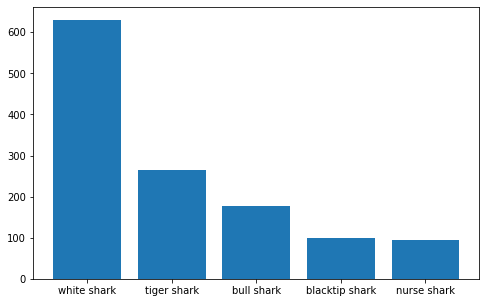

In [356]:
fig, ax = plt.subplots(figsize=(8,5))
plt.bar(x.index, x.values)

plt.show()
#tiburones más comunes

In [363]:
y = shark['Fatal'].value_counts()
y

N          4302
Y          1389
UNKNOWN     612
Name: Fatal, dtype: int64

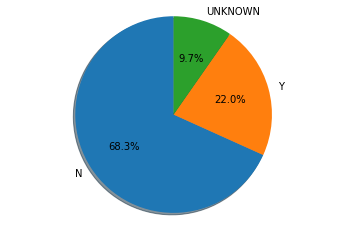

In [365]:
fig1, ax1 = plt.subplots()

ax1.pie(y.values, labels=y.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

In [386]:
x = shark['Age'].value_counts()[1:].head(50)


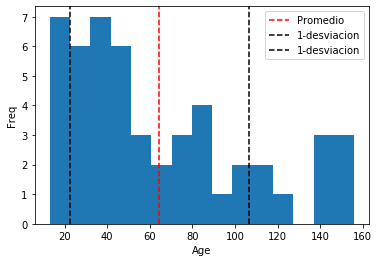

In [390]:

fig, ax = plt.subplots()
ax.hist(x, bins = 15)
ax.set_xlabel('Age')
ax.set_ylabel('Freq')
plt.axvline(x.mean(), c = 'r', linestyle = '--', label = 'Promedio')
plt.axvline(x.mean() + x.std(), c = 'k', linestyle = '--', label = '1-desviacion')
plt.axvline(x.mean() - x.std(), c = 'k', linestyle = '--', label = '1-desviacion')
ax.legend()

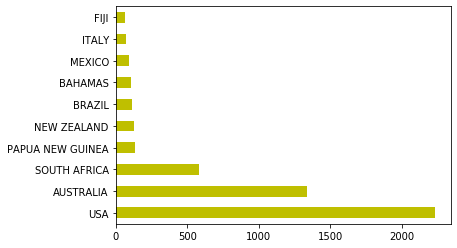

In [397]:
df['Country'].value_counts().head(10).plot.barh(color ='y')
plt.show()

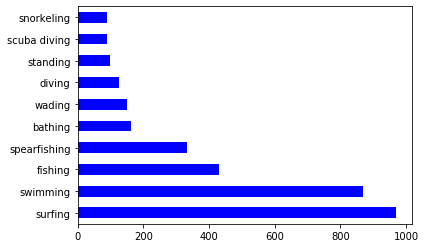

In [398]:
df['Activity'].value_counts().head(10).plot.barh(color ='b')
plt.show()